In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [0]:
#https://drive.google.com/open?id=13lvnO78n8d5GTyWbiqfj2fRGut5oTRRg
TmPy = drive.CreateFile({'id': '13lvnO78n8d5GTyWbiqfj2fRGut5oTRRg'})
TmPy.GetContentFile('TakenPy.xlsx')

In [21]:
!pip install -q xlrd
import pandas as pd
df = pd.read_excel('TakenPy.xlsx')
df

,"The data is for company X which is trying to control attrition. There are two sets of data: ""Existing employees"" and ""Employees who have left"". Following attributes are available for every employee."
0,Satisfaction Level
1,Last evaluation
2,Number of projects
3,Average monthly hours
4,Time spent at the company
5,Whether they have had a work accident
6,Whether they have had a promotion in the last ...
7,Departments (column sales)
8,Salary
9,Whether the employee has left


In [0]:
exf=pd.ExcelFile("TakenPy.xlsx")
df=exf.parse("Existing employees")
df1=exf.parse("Employees who have left")

In [24]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [25]:
df1.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [27]:
print(df.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


In [28]:
print(df1.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


In [31]:
#checking for the job satisfaction greater then 60%
satjob=df[df["satisfaction_level"]>0.6]
print(((len(df)-len(satjob))/len(df))*100,"% People are less than 60% satisfied by job")
print(satjob["satisfaction_level"].mean())

36.13055652782639 % People are less than 60% satisfied by job
0.7987532538703787


In [30]:
#checking for the people who have left the job and their satisfaction
satjob1=df1[df1["satisfaction_level"]>0.6]
print(len(satjob1))
print(len(df1))
print(((len(df1)-len(satjob1))/len(df1))*100,"% People have left job when less than 60% satisfied by job")

971
3571
72.80873704844582 % People have left job when less than 60% satisfied by job


In [32]:
#last evaluation check scores
checkev=df[df["last_evaluation"]>0.5]
print(((len(df)-len(checkev))/len(df))*100,"% People scored less than 50%")

10.456772838641932 % People scored less than 50%


In [33]:
#checking for the people who have left the job
checkev1=df1[df1["last_evaluation"]>0.5]
print(len(checkev1))
print(len(df1))
#people left the job despite the fact that they scored good in their evaluation
print(((len(df1)-len(checkev1))/len(df1))*100,"% left job whose score where less than 50%")

2845
3571
20.33043965275833 % left job whose score where less than 50%


In [35]:
#checking the count of salary
checks=Counter(list(df["salary"]))
print(checks)
#checking for the left one
checks1=Counter(list(df1["salary"]))
print(checks1)
#can be observed that the people with less salary have left the job most

Counter({'low': 5144, 'medium': 5129, 'high': 1155})
Counter({'low': 2172, 'medium': 1317, 'high': 82})


In [37]:
#checking the department of people
depts=dict(Counter(list(df["dept"])))
print(depts)
#checking for the change of people %
depts1=dict(Counter(list(df1["dept"])))
print(depts1)
store={}
#checking job change % wise
if len(depts)==len(depts1):
    for i in depts.keys():
        print(i,(depts[i]-depts1[i]),"has been changed ",((depts[i]-depts1[i])/depts[i])*100,"%left the job")
        store[i]=((depts[i]-depts1[i])/depts[i])*100

{'sales': 3126, 'accounting': 563, 'hr': 524, 'technical': 2023, 'support': 1674, 'management': 539, 'IT': 954, 'product_mng': 704, 'RandD': 666, 'marketing': 655}
{'sales': 1014, 'accounting': 204, 'hr': 215, 'technical': 697, 'support': 555, 'management': 91, 'IT': 273, 'product_mng': 198, 'marketing': 203, 'RandD': 121}
sales 2112 has been changed  67.56238003838772 %left the job
accounting 359 has been changed  63.765541740674955 %left the job
hr 309 has been changed  58.96946564885496 %left the job
technical 1326 has been changed  65.54621848739495 %left the job
support 1119 has been changed  66.84587813620072 %left the job
management 448 has been changed  83.11688311688312 %left the job
IT 681 has been changed  71.38364779874213 %left the job
product_mng 506 has been changed  71.875 %left the job
RandD 545 has been changed  81.83183183183183 %left the job
marketing 452 has been changed  69.00763358778626 %left the job


In [38]:
for i in store:
    print(i,store[i])

sales 67.56238003838772
accounting 63.765541740674955
hr 58.96946564885496
technical 65.54621848739495
support 66.84587813620072
management 83.11688311688312
IT 71.38364779874213
product_mng 71.875
RandD 81.83183183183183
marketing 69.00763358778626


In [40]:
#we have got the sales report and the % change who left the job


#counting the performance and the promotion thing
countprom=df[df["promotion_last_5years"]==1]
print(len(countprom),"employee got promotion")
#counting the performance and promotion for the people who have left
countprom=df1[df1["promotion_last_5years"]==1]
print(len(countprom),"employee got promotion")

300 employee got promotion
19 employee got promotion


In [43]:
#counting the work performance
countwork=df[df["Work_accident"]==1]
print(len(countwork),"encountered accident")
print(len(df))

2000 encountered accident
11428


In [44]:
#counting the performance and promotion for the people who have left
countwork1=df1[df1["Work_accident"]==1]
print(len(countwork1),"left after an accident")
print(len(df1))

169 left after an accident
3571


In [46]:
#checking hour count
x=df1["average_montly_hours"]
print(x.mean())
df=df[df["average_montly_hours"]>207]
print(len(df))
df1=df1[df1["average_montly_hours"]>207]
print(len(df1))

261.5964266946926
5039
1903


In [47]:
#time_spent_company
xy=df1["time_spend_company"]
print(xy.median())
xyu=df[df["time_spend_company"]>4]
print(len(df1[df1["time_spend_company"]>4]))
print(len(xyu))
#fresher drop

5.0
989
752


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


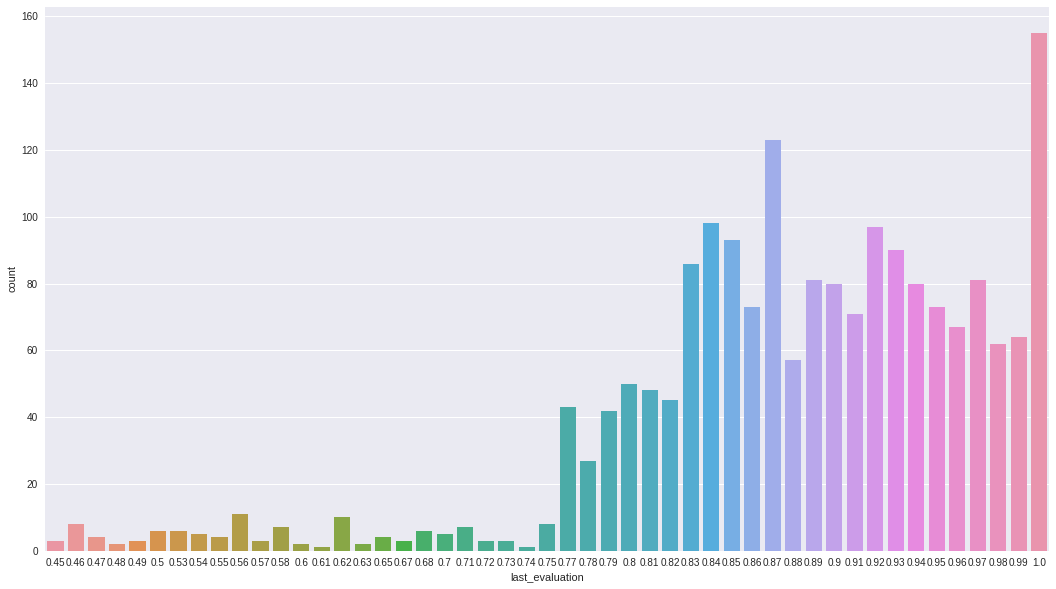

In [50]:
plt.figure(figsize=(18,10))
sns.countplot(df1["last_evaluation"])
plt.show()

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()

In [55]:
df["result"]=0
df1["result"]=1
df=df.append(df1)

df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
9,2010,0.74,0.64,4,268,3,0,0,sales,low,0
10,2011,0.56,0.58,4,258,3,0,0,sales,medium,0
12,2013,0.48,0.94,5,255,6,0,0,accounting,medium,0
13,2014,0.73,0.62,3,218,3,0,0,accounting,medium,0
14,2015,0.59,0.87,3,268,4,0,0,accounting,medium,0
15,2016,0.81,0.57,3,224,2,0,0,hr,medium,0
16,2017,0.90,0.66,3,231,3,0,0,hr,medium,0


In [0]:
le.fit(df["salary"])
df["salary"]=le.transform(df["salary"])
le.fit(df["dept"])
df["dept"]=le.transform(df["dept"])

In [62]:
io=df.corr()
plt.figure(figsize=(72,40))

<Figure size 5184x2880 with 0 Axes>

<Figure size 5184x2880 with 0 Axes>

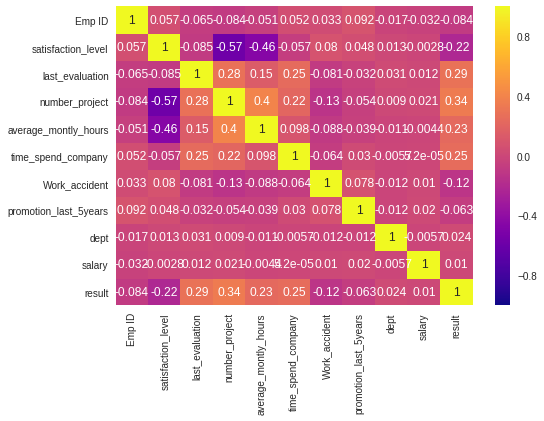

In [63]:
sns.heatmap(io,cmap="plasma",annot=True)
plt.show()

In [0]:
df
dfio=df[df["dept"]==7]

In [66]:
dfio=dfio[dfio["salary"]==1]
dfio

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,2001,0.58,0.74,4,215,3,0,0,7,1,0
3,2004,0.78,0.82,5,247,3,0,0,7,1,0
4,2005,0.49,0.60,3,214,2,0,0,7,1,0
9,2010,0.74,0.64,4,268,3,0,0,7,1,0
69,2070,0.53,0.81,3,226,3,1,0,7,1,0
71,2072,0.92,0.65,4,238,2,0,0,7,1,0
76,2077,0.51,0.69,3,212,3,0,0,7,1,0
77,2078,0.74,0.62,4,236,4,0,0,7,1,0
78,2079,0.69,0.57,5,245,2,1,0,7,1,0
79,2080,0.84,0.64,4,267,4,0,0,7,1,0


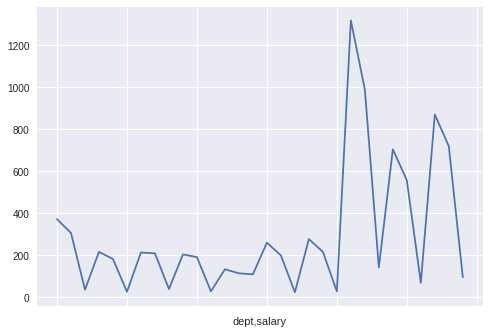

In [67]:
df.groupby(["dept"])["salary"].value_counts().plot()
plt.show()

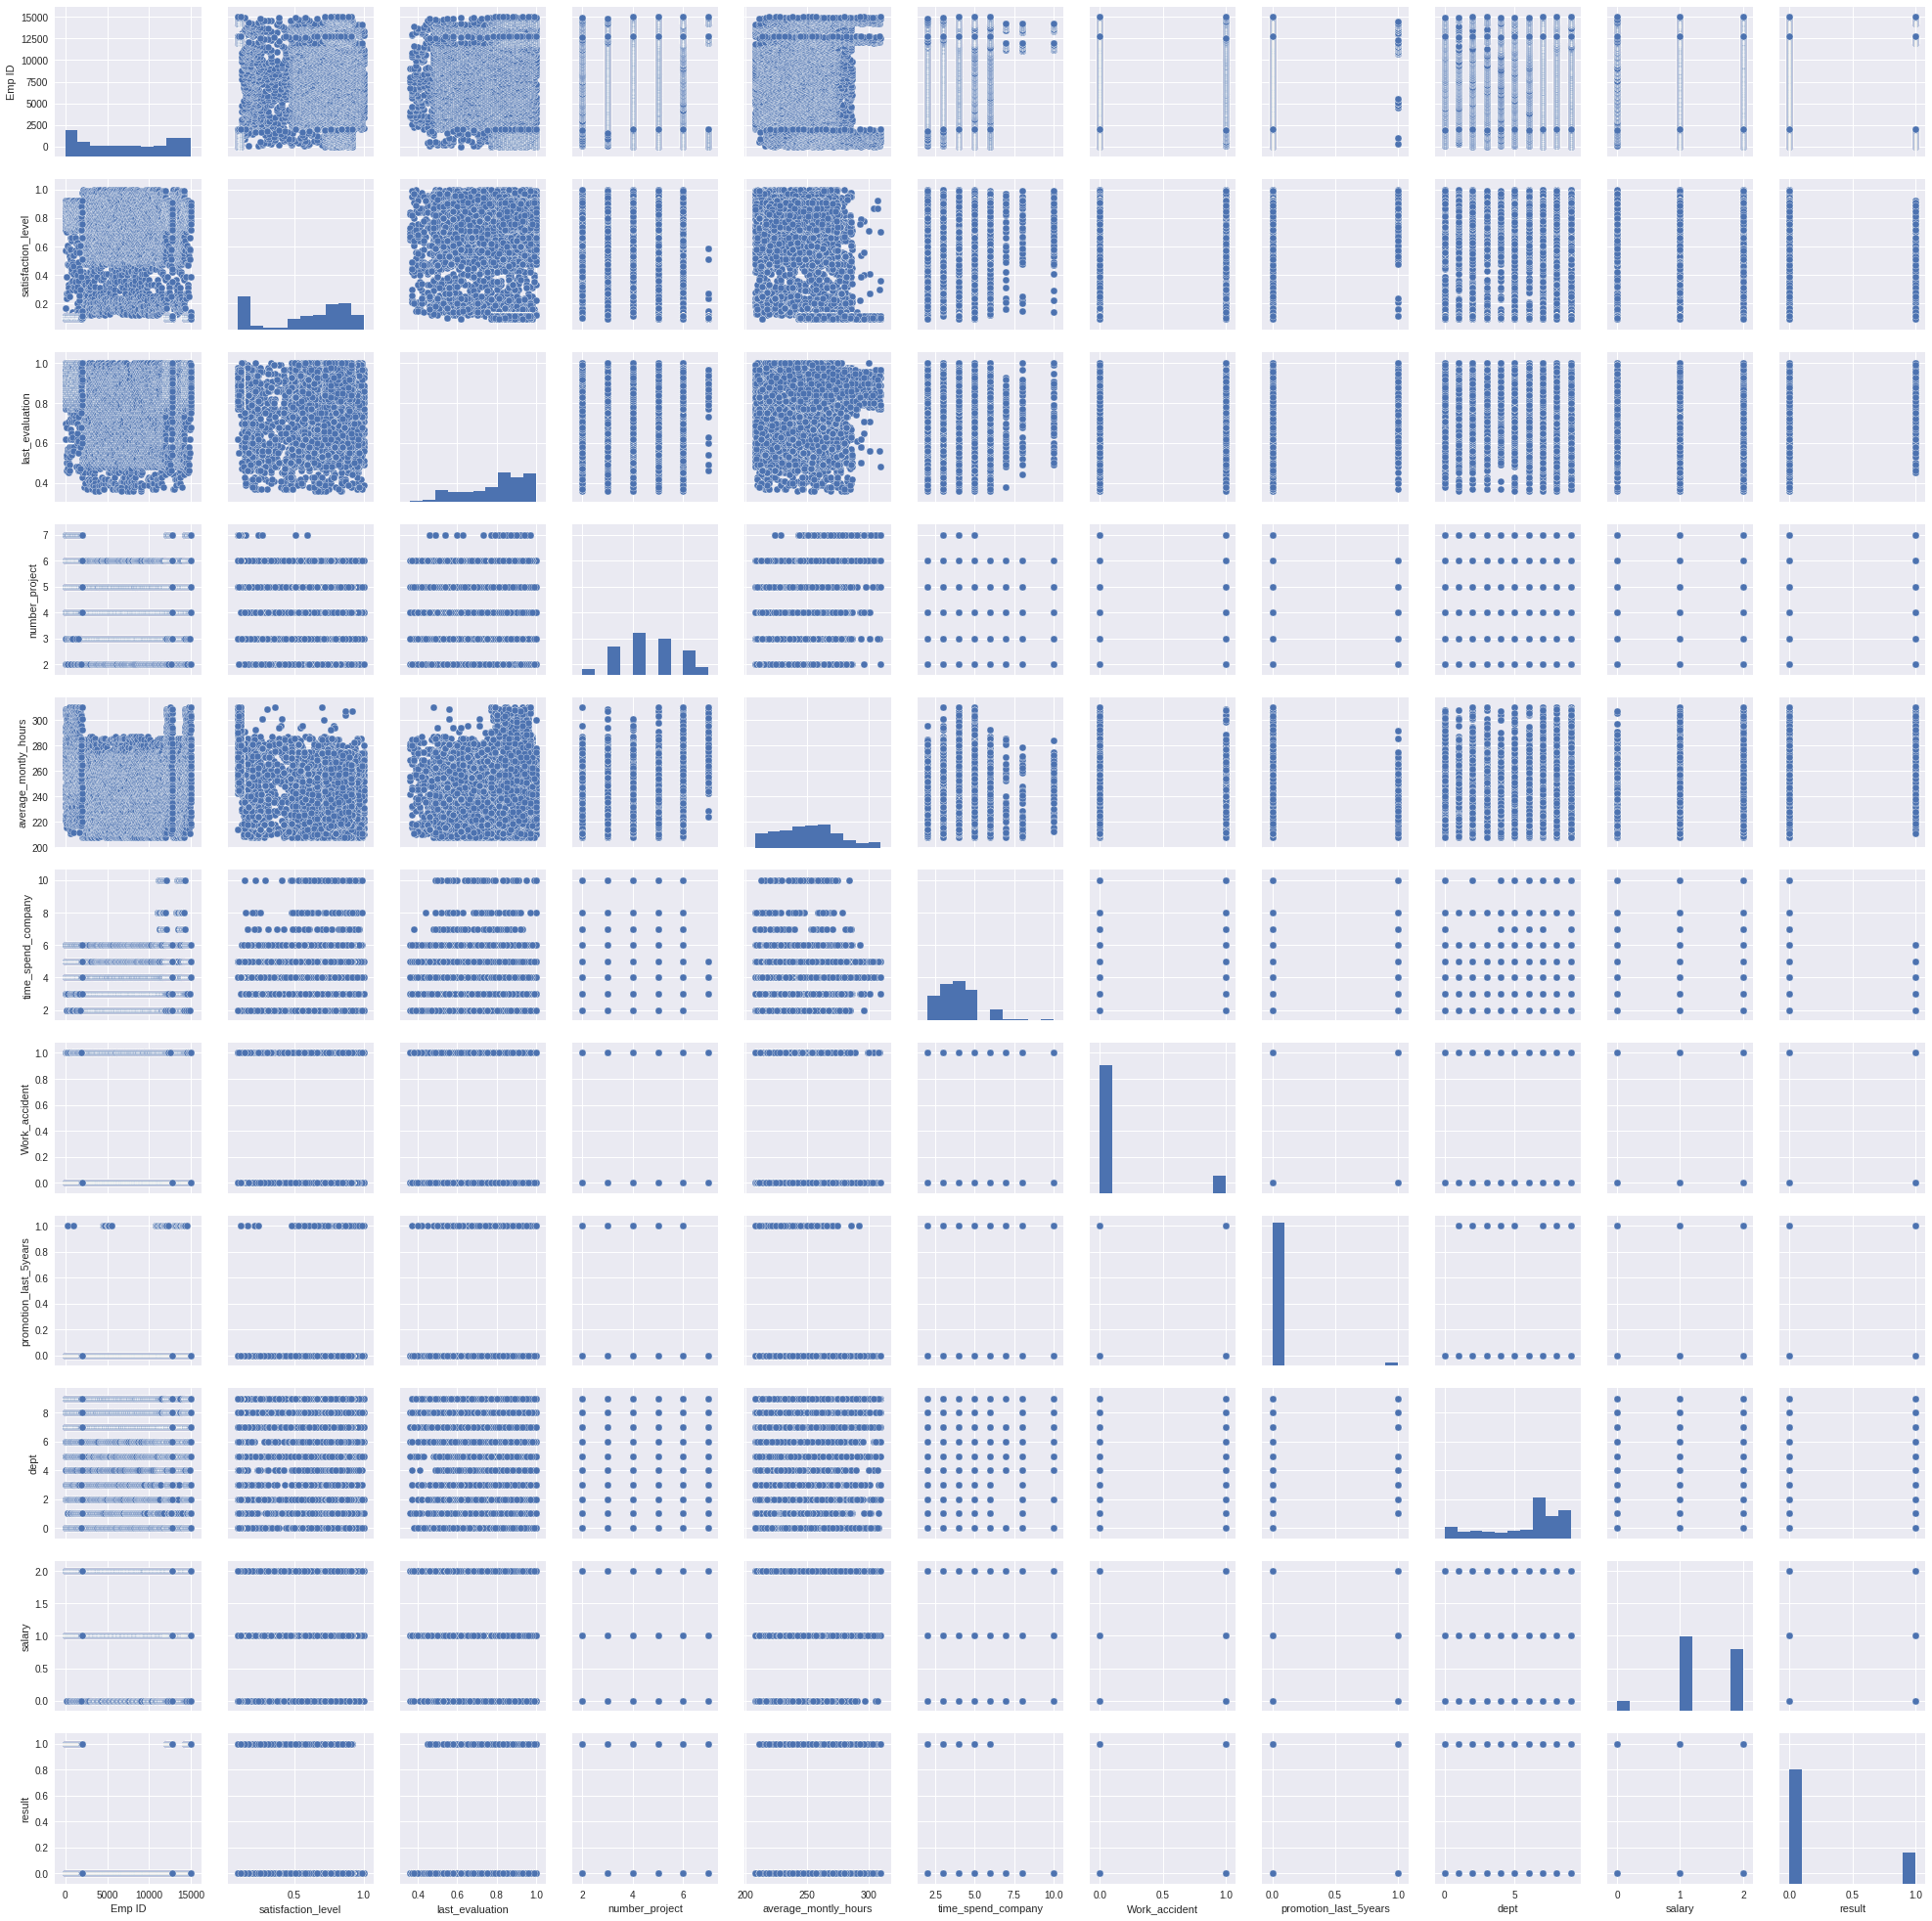

In [68]:
sns.pairplot(df)
plt.show()

In [69]:
df1

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
6,7,0.10,0.77,6,247,4,0,0,sales,low,1
7,8,0.92,0.85,5,259,5,0,0,sales,low,1
8,9,0.89,1.00,5,224,5,0,0,sales,low,1
11,12,0.11,0.81,6,305,4,0,0,sales,low,1
12,13,0.84,0.92,4,234,5,0,0,sales,low,1
17,18,0.78,0.99,4,255,6,0,0,sales,low,1
19,20,0.76,0.89,5,262,5,0,0,sales,low,1


In [0]:
le.fit(df1["salary"])
df1["salary"]=le.transform(df1["salary"])

In [0]:
le.fit(df1["dept"])
df1["dept"]=le.transform(df1["dept"])

In [72]:
df1

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,4,0.72,0.87,5,223,5,0,0,7,1,1
6,7,0.10,0.77,6,247,4,0,0,7,1,1
7,8,0.92,0.85,5,259,5,0,0,7,1,1
8,9,0.89,1.00,5,224,5,0,0,7,1,1
11,12,0.11,0.81,6,305,4,0,0,7,1,1
12,13,0.84,0.92,4,234,5,0,0,7,1,1
17,18,0.78,0.99,4,255,6,0,0,7,1,1
19,20,0.76,0.89,5,262,5,0,0,7,1,1


In [0]:
dfcp=df1[:]
del dfcp["Emp ID"]

In [0]:
pocorr=dfcp.corr()

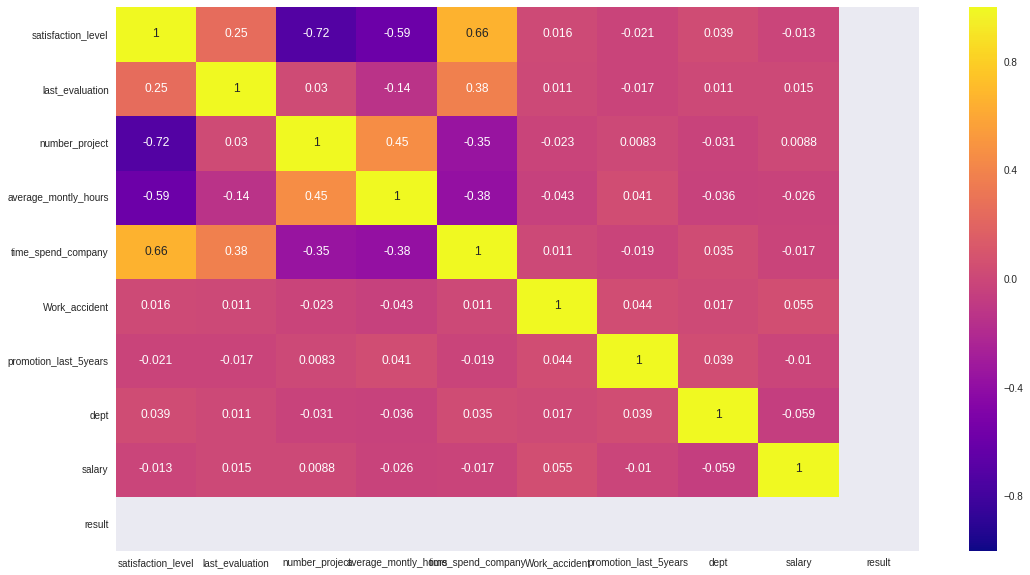

In [75]:
plt.figure(figsize=(18,10))
sns.heatmap(pocorr,annot=True,cmap="plasma")

In [76]:
plt.savefig("check12.png")
plt.show()

<Figure size 576x396 with 0 Axes>

In [77]:
print(Counter(df1["number_project"]))

Counter({6: 628, 5: 581, 4: 376, 7: 248, 3: 38, 2: 32})


In [82]:
print(Counter(df1["average_montly_hours"]))

Counter({245: 47, 254: 47, 255: 46, 275: 38, 244: 35, 264: 35, 257: 35, 260: 35, 263: 34, 247: 33, 267: 31, 253: 31, 262: 30, 269: 30, 258: 30, 259: 29, 243: 29, 249: 28, 232: 28, 246: 26, 282: 25, 251: 25, 250: 25, 271: 25, 239: 24, 256: 24, 301: 24, 266: 24, 242: 23, 274: 23, 261: 23, 270: 23, 248: 23, 286: 22, 278: 22, 219: 22, 268: 22, 296: 21, 308: 20, 265: 20, 228: 20, 236: 20, 226: 19, 289: 19, 229: 19, 223: 18, 305: 18, 306: 18, 281: 18, 276: 18, 238: 18, 310: 18, 304: 17, 273: 17, 291: 17, 279: 17, 221: 17, 240: 17, 287: 17, 252: 17, 272: 16, 294: 16, 309: 16, 285: 16, 292: 15, 290: 15, 235: 15, 237: 15, 307: 14, 233: 14, 218: 14, 234: 13, 225: 13, 277: 13, 283: 13, 298: 13, 293: 13, 227: 13, 295: 12, 284: 12, 217: 12, 300: 11, 224: 10, 241: 10, 280: 9, 231: 8, 302: 8, 222: 8, 297: 7, 288: 6, 299: 6, 303: 6, 216: 5, 214: 5, 220: 5, 211: 3, 230: 3, 213: 2, 212: 2})


In [83]:
print(Counter(df1["dept"]))

Counter({7: 522, 9: 403, 8: 294, 0: 155, 6: 109, 2: 106, 5: 97, 3: 95, 1: 70, 4: 52})
